In [1]:
import sys
sys.path.append("./../")
import matplotlib.pyplot as plt
from sklearn.datasets import make_spd_matrix
import numpy as np
import zeus
import emcee
from getdist import plots, MCSamples

In [2]:
ndim = 2
nwalkers = 4*ndim
nsteps= 100000


def logp(x):
    f = 0
    for i in range(ndim-1):
        f += 100.0 * (x[i+1]-x[i]**2.0)**2.0 + (1.0-x[i])**2.0
    return -f

#start = np.random.rand(ndim)
p0 = np.random.rand(nwalkers,ndim)
start = p0 + 1e-3*np.random.randn(nwalkers, ndim)

In [3]:
ndim = 2
nwalkers = 4*ndim
nsteps= 10000

def logp(x):
    a = 0
    b = 100
    return -(a-x[0])**2.0 - b*(x[1]-x[0]**2.0)**2.0


p0 = np.random.rand(nwalkers,ndim)
start = p0 + 1e-3*np.random.randn(nwalkers, ndim)

2019-12-04 15:57:52,028 root INFO   Starting sampling...
100%|██████████| 10000/10000 [00:04<00:00, 2332.52it/s]
2019-12-04 15:57:56,318 root INFO   Sampling Complete!


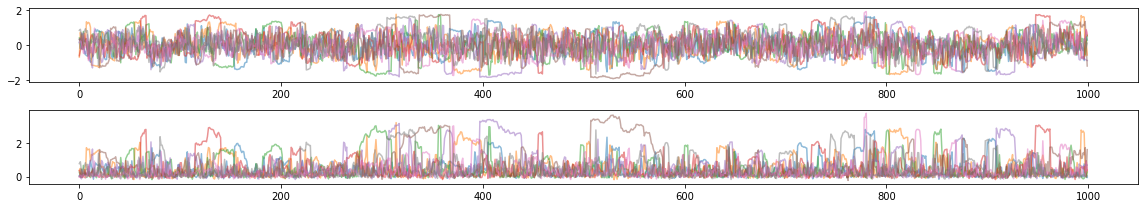

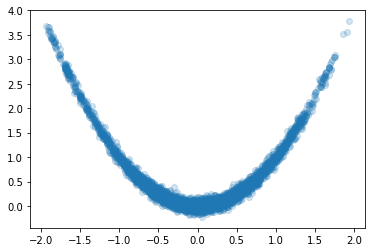

act: 10.833932722087958
ESS: 7384.2068297967135
ESS/LE: 0.02182210291858525


In [4]:
sampler_zeus = zeus.sampler(logp, nwalkers, ndim)
sampler_zeus.run(start, nsteps, thin=10)

plt.figure(figsize=(16,1.5*ndim))
for n in range(ndim):
    plt.subplot2grid((ndim, 1), (n, 0))
    plt.plot(np.arange(np.shape(sampler_zeus.chain)[1]),sampler_zeus.chain[:,:,n].T,alpha=0.5)
plt.tight_layout()
plt.show()

trace_zeus = sampler_zeus.flatten()
plt.scatter(trace_zeus[:,0],trace_zeus[:,1], alpha=0.2)
plt.show()


act_mean_minas = 0.0
for i in range(ndim):
    act_mean_minas += zeus.autocorrtime(trace_zeus[:,i]) 
act_mean_minas /= ndim
print('act:', act_mean_minas)
print('ESS:', nwalkers * nsteps / act_mean_minas)
print('ESS/LE:', (nwalkers * nsteps / act_mean_minas)/sampler_zeus.nlogp)

Removed no burn in


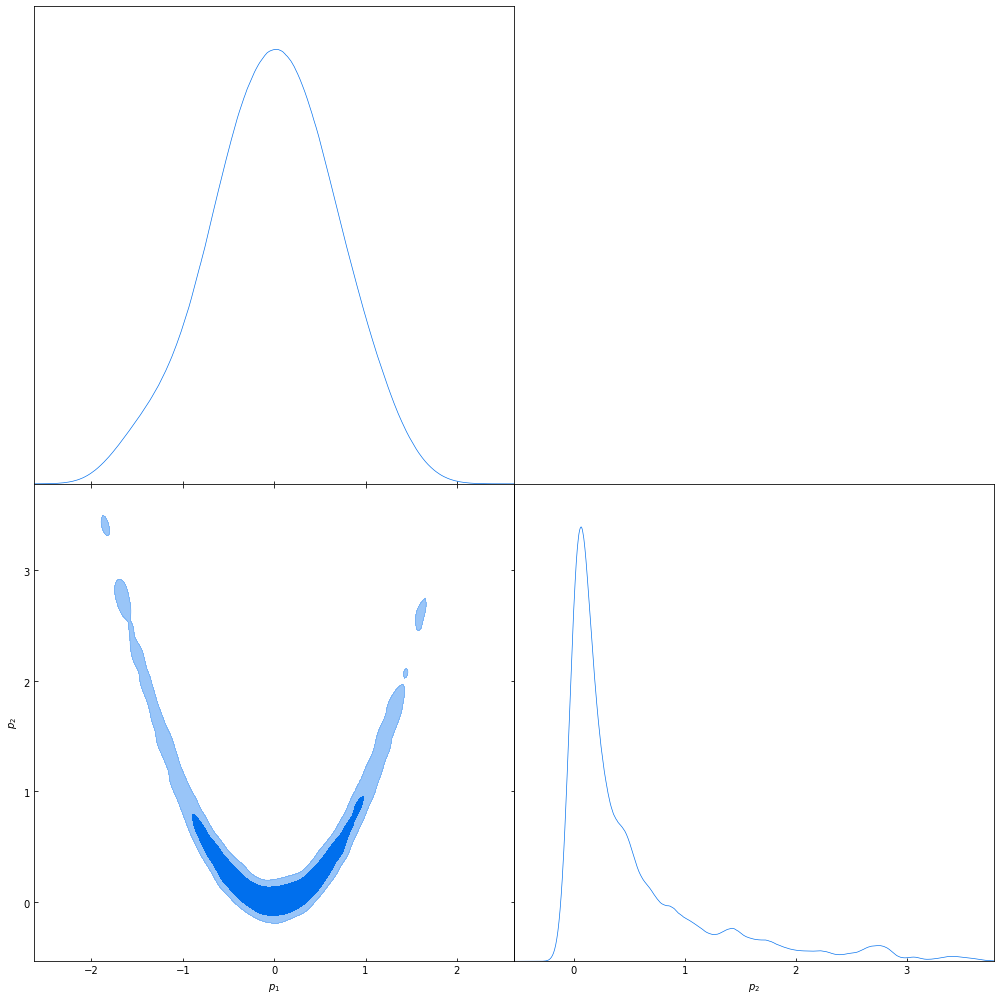

In [5]:
sample_zeus = MCSamples(samples=trace_zeus)
gzeus = plots.getSubplotPlotter(width_inch=14)
gzeus.triangle_plot([sample_zeus], filled=True, shaded=False) 

In [ ]:
nsteps *= 10

In [42]:
nwalkers = 20 * ndim
p0 = np.random.rand(nwalkers,ndim)
start = p0 + 1e-3*np.random.randn(nwalkers, ndim)


100%|██████████| 10000/10000 [00:03<00:00, 2837.32it/s][A


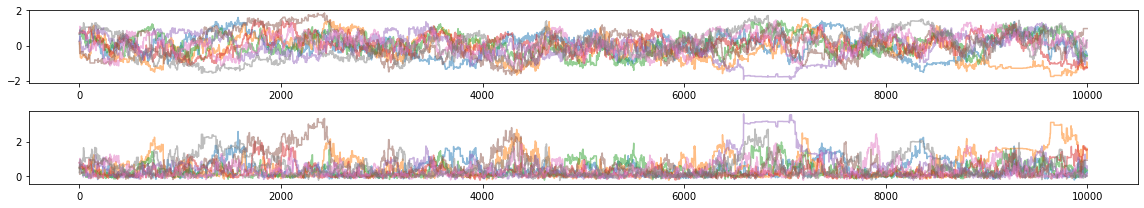

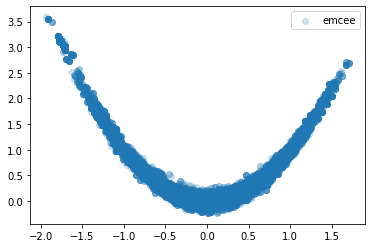

act: 306.52320605964735
ESS: 260.99165876671844
ESS/LE: 0.0032623957345839804


In [22]:
sampler_emcee = emcee.EnsembleSampler(nwalkers, ndim, logp)
sampler_emcee.run_mcmc(start, nsteps, progress=True)
    
plt.figure(figsize=(16,1.5*ndim))
for n in range(ndim):
    plt.subplot2grid((ndim, 1), (n, 0))
    plt.plot(np.arange(np.shape(sampler_emcee.chain)[1]),sampler_emcee.chain[:,:,n].T,alpha=0.5)
plt.tight_layout()
plt.show()

flatten_emcee = sampler_emcee.chain[:,int(nsteps/2):,:].reshape(-1,ndim)
plt.scatter(flatten_emcee[:,0],flatten_emcee[:,1], alpha=0.2, label='emcee')
plt.legend()
plt.show()



act_mean_emcee = 0.0
for i in range(ndim):
    act_mean_emcee += zeus.autocorrtime(flatten_emcee[:,i]) 
act_mean_emcee /= ndim
print('act:', act_mean_emcee)
print('ESS:', nwalkers * nsteps / act_mean_emcee)
print('ESS/LE:', 1.0/ act_mean_emcee)

In [16]:
np.mean(trace_zeus,axis=0)

array([1.00223894, 1.54682416])

In [17]:
np.mean(flatten_emcee,axis=0)

array([1.07495731, 1.68329477])